# Ford GoBike Data Exploration

## by Jochen Zanker

## Preliminary Wrangling

This dataset includes information about individual bicycle rides made in a bike-sharing system covering the greater San Francisco Bay Area. The dataset, which will be explored here, spans from June 2017 to December 2018. The dataset contains "ride-related" and anonymized data only, and includes the following dimensions and metrics:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender



In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os

%matplotlib inline

In [2]:
# programmatically download the 2017 data
file = '2017_fordgobike.csv'
if not os.path.exists(file):
    url = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
    r = requests.get(url)

    if r.status_code == 200:
        with open(file, 'wb') as outfile:
            outfile.write(r.content)
    else:
        print(url,' not found')

# programmatically download the 2018 data
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if not os.path.exists(file):
        url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month + '-fordgobike-tripdata.csv.zip'
        r = requests.get(url)

        if r.status_code == 200:
            with open(file, 'wb') as outfile:
                outfile.write(r.content)
        else:
            print(url,' not found')

In [3]:
# loading the 2017 data into a dataframe
df_2017 = pd.read_csv('2017_fordgobike.csv')
df_2017.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
351949,620,2017-09-13 12:06:14.1200,2017-09-13 12:16:34.2030,181,Grand Ave at Webster St,37.811377,-122.265192,212,Mosswood Park,37.824931,-122.260479,2986,Subscriber,1968.0,Male
258119,585,2017-10-10 10:55:57.8760,2017-10-10 11:05:43.3520,66,3rd St at Townsend St,37.778742,-122.392741,114,Rhode Island St at 17th St,37.764478,-122.402570,2455,Subscriber,1990.0,Male
346040,585,2017-09-14 21:49:33.9370,2017-09-14 21:59:19.5510,181,Grand Ave at Webster St,37.811377,-122.265192,211,Broadway at 40th St,37.827757,-122.256716,2169,Subscriber,1984.0,Male
244054,2013,2017-10-14 13:09:36.7900,2017-10-14 13:43:10.5310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6,The Embarcadero at Sansome St,37.804770,-122.403234,412,Customer,NaN,NaN
387449,379,2017-09-01 17:16:06.9360,2017-09-01 17:22:26.5370,45,5th St at Howard St,37.781752,-122.405127,22,Howard St at Beale St,37.789756,-122.394643,2734,Subscriber,1988.0,Male


In [4]:
# loading the 2018 data in to a dictionary containing a dataframe for each month
dict_2018 = {}
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        dict_2018[month] = pd.read_csv(file)

dict_2018['01'].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40050,581,2018-01-20 15:53:51.6520,2018-01-20 16:03:32.8860,98,Valencia St at 16th St,37.765052,-122.421866,105,16th St at Prosper St,37.764285,-122.431804,458,Subscriber,1985.0,Female,No
89142,410,2018-01-03 09:25:53.6680,2018-01-03 09:32:43.8000,26,1st St at Folsom St,37.787290,-122.394380,45,5th St at Howard St,37.781752,-122.405127,195,Subscriber,1983.0,Male,No
82932,1523,2018-01-05 13:59:06.7680,2018-01-05 14:24:30.6360,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,75,Market St at Franklin St,37.773793,-122.421239,3377,Customer,1998.0,Male,No
58583,1240,2018-01-15 10:23:05.7630,2018-01-15 10:43:46.0450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,120,Mission Dolores Park,37.761420,-122.426435,440,Subscriber,1987.0,Male,No
51017,1079,2018-01-17 09:59:22.0560,2018-01-17 10:17:21.6590,74,Laguna St at Hayes St,37.776435,-122.426244,13,Commercial St at Montgomery St,37.794231,-122.402923,3401,Subscriber,1991.0,Male,No


In [5]:
# checking 2017 columns
df_2017.info()
df_2017.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


Index([u'duration_sec', u'start_time', u'end_time', u'start_station_id',
       u'start_station_name', u'start_station_latitude',
       u'start_station_longitude', u'end_station_id', u'end_station_name',
       u'end_station_latitude', u'end_station_longitude', u'bike_id',
       u'user_type', u'member_birth_year', u'member_gender'],
      dtype='object')

In [6]:
# checking 2018 columns
dict_2018['01'].info()
dict_2018['01'].columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


Index([u'duration_sec', u'start_time', u'end_time', u'start_station_id',
       u'start_station_name', u'start_station_latitude',
       u'start_station_longitude', u'end_station_id', u'end_station_name',
       u'end_station_latitude', u'end_station_longitude', u'bike_id',
       u'user_type', u'member_birth_year', u'member_gender',
       u'bike_share_for_all_trip'],
      dtype='object')

In [7]:
# merge 2018 monthly dataframes to one dataset
list_2018 = []
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        list_2018.append(dict_2018[month])
        
df_2018 = pd.concat(list_2018, ignore_index = True)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [8]:
# drop "bike_share_for_all_trip" column and concatenating 2017 and 2018 dataframes
df_2018 = df_2018.drop(['bike_share_for_all_trip'], axis = 1)
df_all = pd.concat([df_2017, df_2018], ignore_index = True)
df_all.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
2367661,432,2018-12-04 18:19:14.1180,2018-12-04 18:26:26.4600,64.0,5th St at Brannan St,37.776754,-122.399018,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1293,Subscriber,1990.0,Male
2171954,268,2018-11-14 23:42:23.6610,2018-11-14 23:46:52.4510,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,36.0,Folsom St at 3rd St,37.783830,-122.398870,2191,Subscriber,1992.0,Male
2050276,559,2018-10-10 20:28:22.1670,2018-10-10 20:37:41.3150,201.0,10th St at Fallon St,37.797673,-122.262997,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2583,Subscriber,1989.0,Male
905147,926,2018-04-15 18:37:07.8820,2018-04-15 18:52:34.5230,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,3146,Subscriber,1990.0,Male
2065823,332,2018-10-08 19:20:47.1420,2018-10-08 19:26:19.6030,162.0,Franklin St at 9th St,37.800516,-122.272080,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,207,Subscriber,1984.0,Female


In [9]:
pd.options.display.max_info_rows = df_all.shape[0]+1
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 15 columns):
duration_sec               2383421 non-null int64
start_time                 2383421 non-null object
end_time                   2383421 non-null object
start_station_id           2371650 non-null float64
start_station_name         2371650 non-null object
start_station_latitude     2383421 non-null float64
start_station_longitude    2383421 non-null float64
end_station_id             2371650 non-null float64
end_station_name           2371650 non-null object
end_station_latitude       2383421 non-null float64
end_station_longitude      2383421 non-null float64
bike_id                    2383421 non-null int64
user_type                  2383421 non-null object
member_birth_year          2206162 non-null float64
member_gender              2206592 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 272.8+ MB


In [10]:
# check for duplicates
sum (df_all.duplicated())

0

In [11]:
# check gender value counts
df_all['member_gender'].value_counts()

Male      1636403
Female     536809
Other       33380
Name: member_gender, dtype: int64

In [12]:
# check user type value counts
df_all['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

In [13]:
# check earliest and latest ride date in the dataset
df_all['start_time'].min(), df_all['start_time'].max()

('2017-06-28 09:47:36.3470', '2018-12-31 23:59:12.0970')

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_all.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2383421.00,2371650.00,2383421.00,2383421.00,2371650.00,2383421.00,2383421.00,2383421.00,2206162.00
mean,910.01,114.28,37.77,-122.35,112.48,37.77,-122.35,2160.72,1982.54
std,2643.87,97.97,0.10,0.15,97.85,0.10,0.15,1252.54,10.51
min,61.00,3.00,37.26,-122.47,3.00,37.26,-122.47,10.00,1881.00
25%,357.00,30.00,37.77,-122.41,29.00,37.77,-122.41,1119.00,1977.00
50%,564.00,81.00,37.78,-122.40,81.00,37.78,-122.40,2173.00,1985.00
75%,885.00,181.00,37.80,-122.29,180.00,37.80,-122.29,3116.00,1990.00
max,86369.00,381.00,45.51,-73.57,381.00,45.51,-73.57,6234.00,2000.00


#### Make ID Columns String Type
Station IDs and bike ID are numeric when they should be strings. Convert 'start_station_id', 'end_station_id', and 'bike_id' to strings while preserving null values.

In [15]:
# convert non-null float values to strings with no decimal
df_all['start_station_id'] = df_all['start_station_id'].where(df_all['start_station_id'].isnull(), df_all['start_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))
df_all['end_station_id'] = df_all['end_station_id'].where(df_all['end_station_id'].isnull(), df_all['end_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))
df_all['bike_id'] = df_all['bike_id'].astype(str)
df_all[['start_station_id','end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 3 columns):
start_station_id    2371650 non-null object
end_station_id      2371650 non-null object
bike_id             2383421 non-null object
dtypes: object(3)
memory usage: 54.6+ MB


#### Make Birth Year Integer Type
Member birth year is a float when it should be an integer. Convert 'member_birth_year' to integer while representing null values as 0.

In [16]:
df_all['member_birth_year'] = df_all['member_birth_year'].fillna(0).astype(int)
df_all[['member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 1 columns):
member_birth_year    2383421 non-null int64
dtypes: int64(1)
memory usage: 18.2 MB


In [17]:
# check that values are as expected
df_all['member_birth_year'].value_counts().head()

0       177259
1988    126446
1987    109047
1989    104032
1985    103468
Name: member_birth_year, dtype: int64

#### Make Start and End Times Datetime Type
Convert 'start_time' and 'end_time' to datetime type.

In [18]:
# convert start and end times to datetime type
df_all['start_time'] = pd.to_datetime(df_all['start_time'])
df_all['end_time'] = pd.to_datetime(df_all['end_time'])
df_all[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 2 columns):
start_time    2383421 non-null datetime64[ns]
end_time      2383421 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 36.4 MB


#### Calculate User Age
It would be interesting to look at how trips vary across age groups. While we don't have exact birth dates, we can create a rough estimate of user age from their birth year and the ride start time. Represent null ages due to missing birth year by 0.

In [19]:
df_all.loc[df_all['member_birth_year'] == 0, 'user_age'] = 0
df_all.loc[df_all['member_birth_year'] > 0, 'user_age'] = df_all['start_time'].dt.year - df_all['member_birth_year']
df_all['user_age'] = df_all['user_age'].astype(int)
df_all['user_age'].value_counts().head()

0     177259
30    125329
29    108440
31    106688
28    101201
Name: user_age, dtype: int64

In [20]:
# convert seconds to minutes and create new column 'duration_minutes'
df_all['duration_minutes'] = df_all['duration_sec']/60
df_all.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,user_age,duration_minutes
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.78,-122.43,43,San Francisco Public Library (Grove St at Hyde...,37.78,-122.42,96,Customer,1987,Male,30,1335.17
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.78,-122.40,96,Dolores St at 15th St,37.77,-122.43,88,Customer,1965,Female,52,1313.33
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.87,-122.27,245,Downtown Berkeley BART,37.87,-122.27,1094,Customer,0,NaN,0,762.80
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.77,-122.41,5,Powell St BART Station (Market St at 5th St),37.78,-122.41,2831,Customer,0,NaN,0,1036.20
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.87,-122.26,247,Fulton St at Bancroft Way,37.87,-122.27,3167,Subscriber,1997,Female,20,726.72


In [21]:
df_all.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,user_age,duration_minutes
count,2383421.00,2383421.00,2383421.00,2383421.00,2383421.00,2383421.00,2383421.00,2383421.00
mean,910.01,37.77,-122.35,37.77,-122.35,1835.09,32.64,15.17
std,2643.87,0.10,0.15,0.10,0.15,520.27,13.68,44.06
min,61.00,37.26,-122.47,37.26,-122.47,0.00,0.00,1.02
25%,357.00,37.77,-122.41,37.77,-122.41,1974.00,26.00,5.95
50%,564.00,37.78,-122.40,37.78,-122.40,1984.00,32.00,9.40
75%,885.00,37.80,-122.29,37.80,-122.29,1990.00,40.00,14.75
max,86369.00,45.51,-73.57,45.51,-73.57,2000.00,137.00,1439.48


In [26]:
df_all.to_csv("fordgobike_combined.csv", header=True, index=False)

### What is the structure of your dataset?

The dataset has approx. 2.38 million entries and 17 columns in total. Each row represents a bike ride / rental in the period of June 2017 to December 2018. The dataset contains numerical and categorical data at the same time. Station names, the user type (subscriber or customer), gender belong to the categorical type. To numerical data belongs the user’s year of birth and the trips duration, which is also implied by the moments start and end data-time-stamps. Furthermore, the start and end stations coordinates are also included as numeric latitude and longitude columns. In addition, bikes and stations are indicated by unique IDs.



### What is/are the main feature(s) of interest in your dataset?

I am most interested to look at the usage in terms of the number of overall rides, duration and duration per ride. I want to explore what kind of users (separated by user type, gender and age) are using the FordGoBike service most and least. This exploration should provide guidance for potential growth / business opportunities.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Information about users such as birth year and gender can give us insight regarding the user population. Information about trip location and duration can give us insight regarding how the population utilizes GoBikes.

In [167]:
df = df_all.copy()

## Univariate Exploration


In [168]:
# setting some default parameters for visualization.
sb.set_style('whitegrid')
default_color = sb.color_palette()[0]

In [169]:
# percentaged distribution of users
(df.user_type.value_counts(sort=True, normalize=True)*100)

Subscriber   83.61
Customer     16.39
Name: user_type, dtype: float64

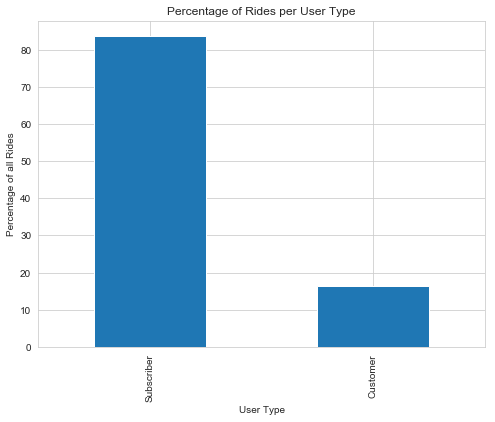

In [170]:
plt.figure(figsize=[8, 6])
(df.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of Rides per User Type")
plt.ylabel("Percentage of all Rides")
plt.xlabel("User Type");

The majority of rides has been done by users of the type subscribers.

In [171]:
# percentaged distribution of gender
(df.member_gender.value_counts(sort=True, normalize=True)*100)

Male     74.16
Female   24.33
Other     1.51
Name: member_gender, dtype: float64

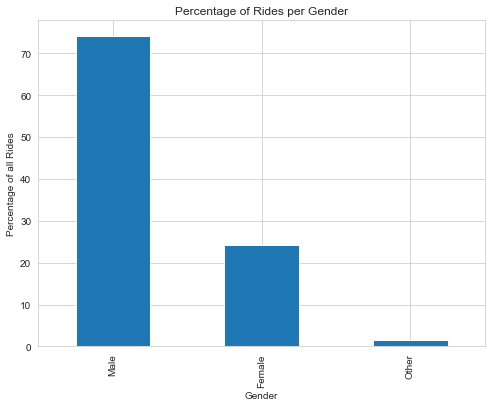

In [172]:
plt.figure(figsize=[8, 6])
(df.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Gender")
plt.ylabel("Percentage of all Rides")
plt.xlabel("Gender");

The majority of trips are taken by male users.

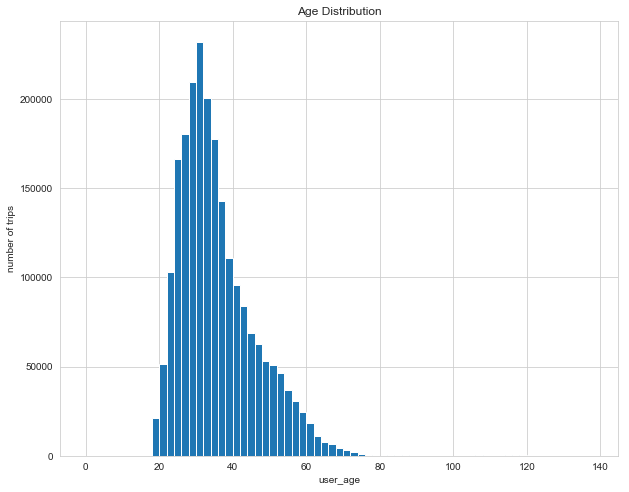

In [173]:
plt.figure(figsize=(10,8))
df_age = df.query('user_age > 0')
bins = np.arange(0, df_age['user_age'].max()+2, 2)
plt.hist(data = df_age, x = 'user_age', bins = bins)
plt.title("Age Distribution")
plt.xlabel('user_age')
plt.ylabel('number of trips');

Since this plot does not reveal any potential outliers due to the fitted scale for the high amount of users aged around 30, I shall add a box plot to gain more insight.

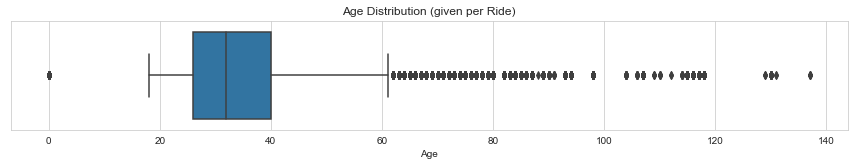

In [174]:
plt.figure(figsize=(15,2))
sb.boxplot(x='user_age', data = df, color = default_color);
plt.title("Age Distribution (given per Ride)")
plt.xlabel("Age");

The boxplot shows, like the histogram before, that the majority of ages lies around 30. The boxplot reveals outliers which need to be investigated. The outliers between 60 and 100 years seem reasonable. To use this service one needs to know how to operate with apps and needs to understand that the service is based on internet connectivity. Apart to the physical ability to ride bikes, this setting naturally induces these outliers. However, people aging above hundred years seem odd.

In [175]:
# separating entries with invalid ages
df_outliers_age_100 = df[(df.user_age > 100)]

In [176]:
# overview of those unnatural outliers
df_outliers_age_100.user_age.value_counts()

118    632
107    262
115    218
116    173
117    171
130     23
104     18
114     12
106     12
110      7
137      5
109      4
129      3
131      2
112      2
Name: user_age, dtype: int64

In [177]:
# how many outliers do exist?
len(df_outliers_age_100)

1544

Some users seem to have checked the birth year 1900 or earlier. It appears, these users did not want to provide their birth year from some reason or just missed it. Therefore I will insert 0 in the according rows. This solution does not compromise data quality too much in comparison to delete those rows instead.

In [178]:
# separating entries with valid ages
df_valid = df[(df.user_age <= 100)]

In [179]:
df_valid.shape

(2381877, 17)

In [180]:
# setting columns member_birth_year and user_age to 0 for those with invalid ages.

df_outliers_age_100.member_birth_year = 0
df_outliers_age_100.user_age = 0

df_outliers_age_100.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,user_age,duration_minutes
925070,487,2018-04-10 18:22:56.052,2018-04-10 18:31:03.083,173,Shattuck Ave at 55th Ave,37.84,-122.26,215,34th St at Telegraph Ave,37.82,-122.27,997,Subscriber,0,Male,0,8.12
1388093,345,2018-07-24 16:05:07.347,2018-07-24 16:10:52.652,49,S Park St at 3rd St,37.78,-122.39,284,Yerba Buena Center for the Arts (Howard St at ...,37.78,-122.40,2022,Subscriber,0,Other,0,5.75
1945053,156,2018-10-27 10:29:02.778,2018-10-27 10:31:39.265,204,55th St at Telegraph Ave,37.84,-122.26,175,49th St at Telegraph Ave,37.84,-122.26,1247,Subscriber,0,Male,0,2.60


In [181]:
# append the dataframes into a new dataframe
df_valid = df_valid.append(df_outliers_age_100, sort=False, ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 17 columns):
duration_sec               2383421 non-null int64
start_time                 2383421 non-null datetime64[ns]
end_time                   2383421 non-null datetime64[ns]
start_station_id           2371650 non-null object
start_station_name         2371650 non-null object
start_station_latitude     2383421 non-null float64
start_station_longitude    2383421 non-null float64
end_station_id             2371650 non-null object
end_station_name           2371650 non-null object
end_station_latitude       2383421 non-null float64
end_station_longitude      2383421 non-null float64
bike_id                    2383421 non-null object
user_type                  2383421 non-null object
member_birth_year          2383421 non-null int64
member_gender              2206592 non-null object
user_age                   2383421 non-null int64
duration_minutes           2383421 non-null float64
dt

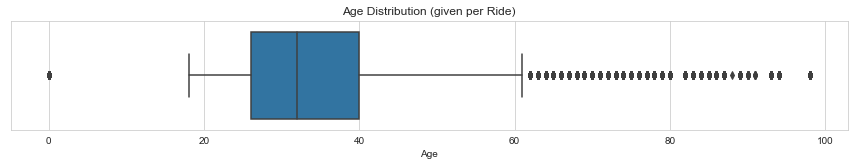

In [182]:
# checking everything went right
df_valid.info()
plt.figure(figsize=(15,2))
sb.boxplot(x='user_age', data = df_valid, color = default_color);
plt.title("Age Distribution (given per Ride)")
plt.xlabel("Age");

In [183]:
# making a copy of the dataframe for further exploration
df2 = df_valid.copy()

Now, that the values for age and birth year have been corrected. I want to segment the age values into age groups to make further bivariate or multivariate analysis more comfortable. Segments of ten years should work. Starting at 15 to 24 years, 25 to 34 years, etc. should be adequate.

In [184]:
df2['age_group'] = pd.cut(df2.user_age, [0,24,34,44,54,64,74,84,94,100], labels =['15-24', '25-34','35-44', '45-54','55-64', '65-74','75-84', '85-94','95-100'])

In [185]:
df2.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,user_age,duration_minutes,age_group
1021031,609,2018-05-21 19:18:29.439,2018-05-21 19:28:38.490,25,Howard St at 2nd St,37.79,-122.40,60,8th St at Ringold St,37.77,-122.41,2634,Subscriber,1993,Male,25,10.15,25-34
2242378,338,2018-11-02 08:11:14.855,2018-11-02 08:16:52.896,183,Telegraph Ave at 19th St,37.81,-122.27,372,Madison St at 17th St,37.80,-122.26,3367,Subscriber,1983,Male,35,5.63,35-44
368516,570,2017-09-08 07:57:26.230,2017-09-08 08:06:56.958,30,San Francisco Caltrain (Townsend St at 4th St),37.78,-122.40,21,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,2556,Subscriber,1987,Male,30,9.50,25-34
2035938,450,2018-10-12 17:31:14.720,2018-10-12 17:38:45.325,90,Townsend St at 7th St,37.77,-122.40,44,Civic Center/UN Plaza BART Station (Market St ...,37.78,-122.41,3161,Customer,1984,Male,34,7.50,25-34
1226249,153,2018-06-18 18:42:44.701,2018-06-18 18:45:18.579,132,24th St at Chattanooga St,37.75,-122.43,137,Jersey St at Castro St,37.75,-122.43,4220,Subscriber,1985,Male,33,2.55,25-34
1459036,1662,2018-07-13 13:33:25.595,2018-07-13 14:01:07.610,28,The Embarcadero at Bryant St,37.79,-122.39,6,The Embarcadero at Sansome St,37.80,-122.40,73,Customer,0,NaN,0,27.70,NaN
1513977,166,2018-07-05 10:54:18.388,2018-07-05 10:57:04.809,15,San Francisco Ferry Building (Harry Bridges Pl...,37.80,-122.39,9,Broadway at Battery St,37.80,-122.40,4060,Subscriber,1989,Male,29,2.77,25-34
1003264,826,2018-05-24 16:52:33.290,2018-05-24 17:06:20.029,16,Steuart St at Market St,37.79,-122.39,30,San Francisco Caltrain (Townsend St at 4th St),37.78,-122.40,1733,Customer,1970,Male,48,13.77,45-54
1180694,588,2018-06-25 17:07:57.432,2018-06-25 17:17:45.486,81,Berry St at 4th St,37.78,-122.39,15,San Francisco Ferry Building (Harry Bridges Pl...,37.80,-122.39,523,Subscriber,0,NaN,0,9.80,NaN
769383,1197,2018-03-19 17:48:28.995,2018-03-19 18:08:26.145,148,Horton St at 40th St,37.83,-122.29,218,DeFremery Park,37.81,-122.29,1296,Customer,1991,Male,27,19.95,25-34


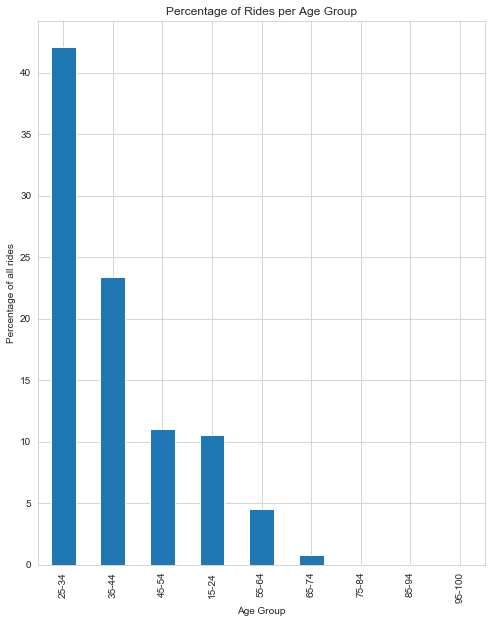

In [186]:
plt.figure(figsize=[8, 10])
(df2.age_group.value_counts()/len(df2)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Age Group")
plt.ylabel('Percentage of all rides')
plt.xlabel('Age Group');

The graph shows that users between 25-34 made up for more than 40% of all rides. Users between 35-44 are the second biggest user group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first visualizations reveal that the majority of the rides (84%) were done by users of the subscriber type. Male users account for the most rides (74%), whereas female users account for 24%. Most users are between 25-34 years old. The second biggest group ages between 35-44 years. Unusual are some users with ages far above 100 years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The dataset contained outliers in the column 'member_birth_year' which needed to be addressed by filtering them out. In addition, the same column contained NaNs. The other two of three dimensions did not contain any unusual points. After addressing the outlier issue, these three variables may well serve as separation segments in the bivariate and multivariate exploration later on.

Since the year of birth was not suitable for visualization, I decided to go for the age instead. The age appeared more intuitive to me. So adding and calculating this column has been necessary. In addition, I took a closer look at the values of the column user_age and decided to set every value above 100 years to 0. I did the same for the NaN values. Up until around 100 years, it could theoretically be tue, however everything above is most certainly not the truth. Note: I prefer to remove outliers in age by human logic instead of statistical logic. The statistics would have cut off rides of users older than approximately 60 years. However, this would be too drastic in human terms, where people can be perfectly capable of riding a bike even when being 95 years old. I also preferred setting outliers to 0 instead of excluding these rows, to not reduce too much on data validity for analysis which is in depended on the age.

To ease the viewability of the visualizations I decided to assign the given age of each ride to its according age group. I decided for the following split, according to the prior mentioned marketing standards: 15 to 24 years, 25 to 34 years, etc. till 95 to 100 year.

## Bivariate Exploration

Next I am going to analyze which user group, segmented by age and gender uses the FordGoBike service most. This serves as a preliminary information to elaborate the amount of rides, the duration and the duration per ride and user group later on.

In [187]:
df2.member_gender.value_counts()

Male      1636403
Female     536809
Other       33380
Name: member_gender, dtype: int64

For reasons of relevance, I continue the exploration with data of users which indicated their gender by female or male. The first step is to look at the distribution of gender per age group.

In [188]:
df2_male = df2[(df2.member_gender == "Male")]
df2_female = df2[(df2.member_gender == "Female")]

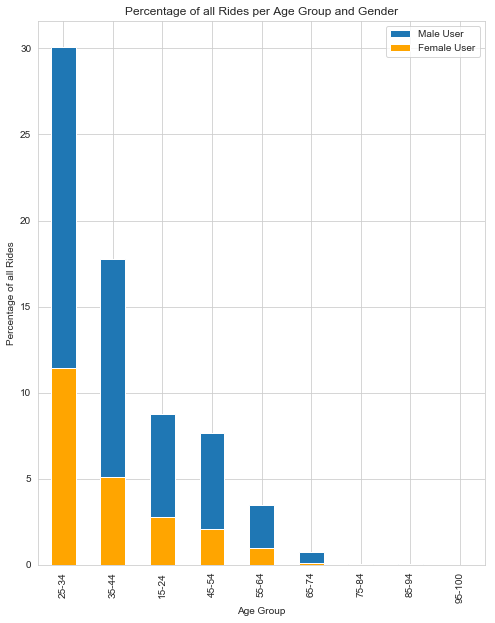

In [189]:
plt.figure(figsize=[8, 10])
(df2_male.age_group.value_counts() / len(df2)*100).plot.bar(color = default_color, label='Male User');
(df2_female.age_group.value_counts() / len(df2)*100).plot.bar(color = 'orange', label='Female User');
plt.legend(loc='upper right')
plt.title("Percentage of all Rides per Age Group and Gender")
plt.ylabel('Percentage of all Rides')
plt.xlabel('Age Group');

This graph shows how the rides are proportioned across the age groups. By far, most rides were done by male users between 25 and 34 years.

Next, I am going to take a different perspective on the distribution of gender and their respective amount of rides.

In [192]:
# rides without NaNs in birth / age, gender male and female only.
df2_without_age_nan = df2[(df2.user_age.notnull()) &
                                          ((df2.member_gender == "Male") |
                                           (df2.member_gender == "Female"))]

In [193]:
df2_without_age_nan.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,user_age,duration_minutes,age_group
2060737,341,2018-10-09 10:39:53.349,2018-10-09 10:45:35.110,246,Berkeley Civic Center,37.87,-122.27,274,Oregon St at Adeline St,37.86,-122.27,3556,Subscriber,1974,Female,44,5.68,35-44
1345090,188,2018-07-30 22:45:45.682,2018-07-30 22:48:54.529,247,Fulton St at Bancroft Way,37.87,-122.27,244,Shattuck Ave at Hearst Ave,37.87,-122.27,1276,Subscriber,1996,Male,22,3.13,15-24
967055,459,2018-05-31 12:33:13.506,2018-05-31 12:40:52.912,89,Division St at Potrero Ave,37.77,-122.41,61,Howard St at 8th St,37.78,-122.41,3116,Subscriber,1978,Male,40,7.65,35-44
172042,138,2017-11-03 11:37:24.392,2017-11-03 11:39:42.598,112,Harrison St at 17th St,37.76,-122.41,129,Harrison St at 20th St,37.76,-122.41,1829,Subscriber,1982,Male,35,2.30,35-44
1312109,736,2018-06-05 09:16:20.498,2018-06-05 09:28:37.025,81,Berry St at 4th St,37.78,-122.39,22,Howard St at Beale St,37.79,-122.39,224,Subscriber,1987,Female,31,12.27,25-34
2270437,2118,2018-12-25 09:35:18.460,2018-12-25 10:10:37.024,284,Yerba Buena Center for the Arts (Howard St at ...,37.78,-122.40,21,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,5567,Subscriber,1985,Female,33,35.30,25-34
2295615,567,2018-12-18 18:10:38.771,2018-12-18 18:20:06.388,312,San Jose Diridon Station,37.33,-121.90,311,Paseo De San Antonio at 2nd St,37.33,-121.89,1634,Subscriber,1974,Male,44,9.45,35-44
1596807,938,2018-08-22 10:26:35.848,2018-08-22 10:42:14.154,255,Virginia St at Shattuck Ave,37.88,-122.27,256,Hearst Ave at Euclid Ave,37.88,-122.26,3753,Subscriber,1985,Male,33,15.63,25-34
2140943,485,2018-11-26 08:28:22.378,2018-11-26 08:36:28.314,78,Folsom St at 9th St,37.77,-122.41,67,San Francisco Caltrain Station 2 (Townsend St...,37.78,-122.40,2550,Subscriber,1996,Male,22,8.08,15-24
1318579,169,2018-06-04 13:09:41.684,2018-06-04 13:12:31.375,64,5th St at Brannan St,37.78,-122.40,79,7th St at Brannan St,37.77,-122.40,3911,Subscriber,1971,Male,47,2.82,45-54


In [194]:
df2_without_age_nan.shape

(2173212, 18)

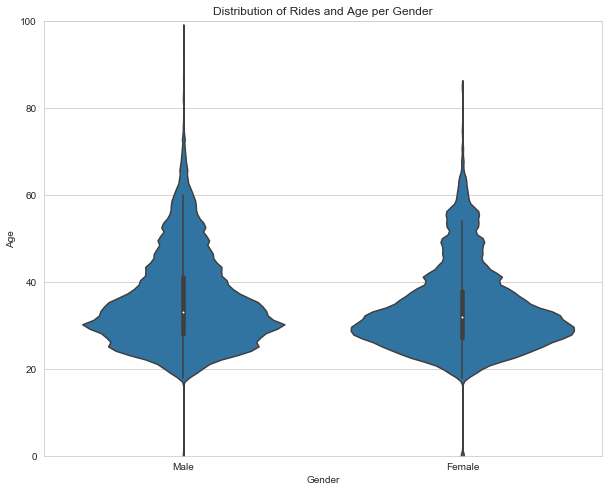

In [195]:
#  check if a violin plot can reveal more detailed information
plt.figure(figsize=[10, 8])
sb.violinplot(data = df2_without_age_nan, x = 'member_gender', y = 'user_age', color = default_color)
plt.title("Distribution of Rides and Age per Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.ylim([0,100]);

These violin plots make three things more visible compared to the previous bar plot. First, it shows more clearly, that within the group of rides done by male users, the age distribution a bit more stretched towards higher ages. Second, it shows the relative frequency of rides across both groups (male / female). Thereby it reveals on first sight, that the group of female users is denser around users aging around 30 years (indicated by the width of the "violin"). Third, the interquartile distance (indicated by the thicker line in the middle of each violin) is shorter for the group of female users, which also tells us, that the age distribution is denser.

To visualize the usage, the amount and duration the dataset needs to be segmented by the membership models.

In [196]:
df2_customer = df2[(df2.user_type == "Customer")]
df2_subscriber = df2[(df2.user_type == "Subscriber")]

In [197]:
# check if the separation went well
len(df2_subscriber) + len(df2_customer) == len(df2)

True

Next, I am going to explore how the length of the rides is distributed across the membership models as a preparation to segment those by age group and gender.

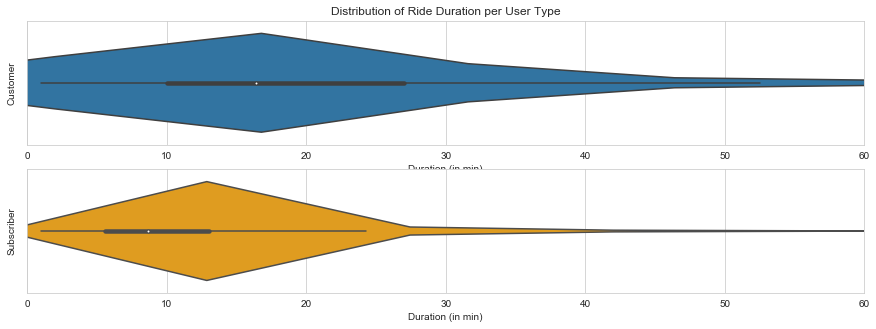

In [198]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
sb.violinplot(x='duration_minutes', data = df2_customer, color = default_color, label ="Customer")
plt.title("Distribution of Ride Duration per User Type")
plt.xlabel("Duration (in min)")
plt.ylabel("Customer")
plt.xlim(0,60);

plt.subplot(2, 1, 2)
sb.violinplot(x='duration_minutes', data = df2_subscriber, color = 'orange', label ="Subscriber")   
plt.xlabel("Duration (in min)")
plt.ylabel("Subscriber")
plt.xlim(0,60);

These plots show the relative distribution of the duration of trips for the group of subscribers and customers. Customers have longer rides than the group of subscribers. The plot also gives a hint, that we have to deal with outliers in this variable.

Next, I will exclude the outliers in duration from further analysis to generate meaningful insights, valid for the majority of rides. But first, I am going to check at which duration it would make sense to exclude data.

From now on, I want to focus the exploration on the group of subscribers only.

In [199]:
df2_subscriber.duration_sec.describe(percentiles = [0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.995, 0.998, 0.999])/60

count   33213.07
mean       11.27
std        24.67
min         1.02
5%          2.88
10%         3.70
25%         5.57
50%         8.63
75%        13.07
90%        18.78
95%        23.65
99.5%      60.15
99.8%     128.22
99.9%     256.28
max      1438.02
Name: duration_sec, dtype: float64

This description of the percentiles shows, that 99.9% of the rides do not take more than 256.28 minutes. For further exploration it makes sense to include as much values as possible to make the analysis on aspects of duration and usage as complete as possible. This handling ensures, that only an absolute minimum of data points is excluded, whereas this plot on its own, would have suggested to remove more outlying values.

Note: To me, 4 hours still seem to be a reasonable trip duration, which might occur from time to time. From a business logic, it makes sense to include those in the analysis, because the happen to be the truth. In addition, the plot shows that only very few trips endure more than 40 minutes. Trips longer than 4 hours may be reasoned by technical issues. The bike might not have been locked properly.

Next, I will exclude rides which took more than 4 hours (14.400 seconds) from the segment of subscribers before continuing with the multivariate exploration.

In [200]:
df2_subscriber_no_outliers = df2_subscriber[(df2_subscriber.duration_sec <= 14400)]

In [202]:
print(str(len(df2_subscriber) - len(df2_subscriber_no_outliers)) +
      " outlying rides from the segment of subscribers are removed.")

2139 outlying rides from the segment of subscribers are removed.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In addition to the fact that female users used the service far less than male users, this part also revealed that female users are generally younger than male users. The relative distribution of age, segmented by gender shows, that the values for age are denser distributed than for males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Regarding the duration of rides, it became visible that subscribers have shorter trips than regular customers. Important at this point, is to handle the outlying values. Although there were very few outlying values, they might cause inaccurate evaluations, as their values (duration) were multiples from the average.

## Multivariate Exploration

Next I want to explore, how the amount of rides and the duration differs among subscribers for each combination/segment of gender and age group.

In [204]:
# removing "Other" values from the column member_gender. This group of users is too insignificant compared to the 
# groups of male or female users. Excluding the group of "Other" will enhance readibility in the visualization.
df2_subscriber_female_male_no_outliers = df2_subscriber_no_outliers[(df2_subscriber_no_outliers.member_gender != "Other")]

In [205]:
df2_subscriber_female_male_no_outliers.member_gender.value_counts()

Male      1467829
Female     457350
Name: member_gender, dtype: int64

To visualize amount of rides and duration segmented by age group and gender, I need to pivot these settings first.

In [206]:
ct_rides_subsriber = df2_subscriber_female_male_no_outliers.groupby(['member_gender', 'age_group']).size()
ct_rides_subsriber = ct_rides_subsriber.reset_index(name = 'count')
ct_rides_subsriber = ct_rides_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'count')

In [207]:
ct_duration_subsriber = df2_subscriber_female_male_no_outliers.groupby(['member_gender', 'age_group'])['duration_sec'].agg('sum')
ct_duration_subsriber = ct_duration_subsriber
ct_duration_subsriber = ct_duration_subsriber.reset_index(name = 'duration_min')
ct_duration_subsriber = ct_duration_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'duration_min')

In [208]:
ct_rides_subsriber

member_gender,Female,Male
age_group,,
15-24,50555.00,157537.00
25-34,230780.00,635832.00
35-44,107949.00,385075.00
45-54,44085.00,191880.00
55-64,21035.00,77692.00
65-74,1693.00,16866.00
75-84,285.00,1655.00
85-94,226.00,452.00
95-100,nan,88.00


In [209]:
ct_duration_subsriber

member_gender,Female,Male
age_group,,
15-24,35802628.00,95249970.00
25-34,160656954.00,381456651.00
35-44,74303441.00,232289859.00
45-54,33302789.00,124217011.00
55-64,17512649.00,54315721.00
65-74,1518928.00,11204631.00
75-84,193439.00,1184833.00
85-94,135512.00,245768.00
95-100,nan,48124.00


In [210]:
# using those two pivot tables to calculate the average per ride on each segment.
ct_duration_per_ride_subscriber = ct_duration_subsriber / ct_rides_subsriber
ct_duration_per_ride_subscriber

member_gender,Female,Male
age_group,,
15-24,708.19,604.62
25-34,696.15,599.93
35-44,688.32,603.23
45-54,755.42,647.37
55-64,832.55,699.12
65-74,897.18,664.33
75-84,678.73,715.91
85-94,599.61,543.73
95-100,nan,546.86


Now, that the data is pivoted per age group and gender, I want to use heatmaps, where the colorization indicates differences in the amount of rides, the duration and the duration per ride, segmented by age group and gender, across the group of subscribers.

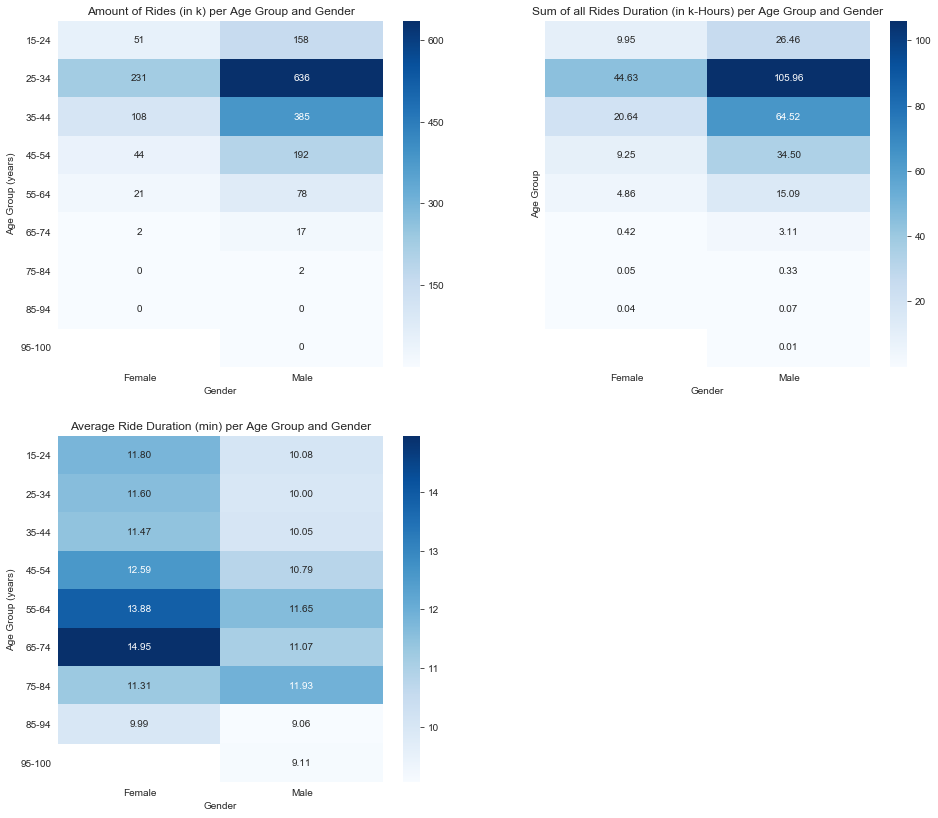

In [211]:
plt.figure(figsize = [16, 14])

plt.subplot(2, 2, 1)
sb.heatmap(ct_rides_subsriber/1000, annot = True, fmt =  '.0f',  cmap = 'Blues')
plt.title("Amount of Rides (in k) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360)

plt.subplot(2, 2, 2)
sb.heatmap(ct_duration_subsriber/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'Blues', yticklabels=False)
plt.title("Sum of all Rides Duration (in k-Hours) per Age Group and Gender")
plt.ylabel("Age Group")
plt.xlabel("Gender")

plt.subplot(2, 2, 3)
sb.heatmap(ct_duration_per_ride_subscriber/60, annot = True, fmt =  '.2f',  cmap = 'Blues');
plt.title("Average Ride Duration (min) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part, I observed that the usage in terms of amount of rides and the duration do not diverge much among the segments of age group and gender. That means, the group with most rides also has the highest total ride duration. The same goes for the other segments. This can easily be identified by the colorization of the first two heatmaps. The highest usage is achieved by male users between 25-34 years. The second highest by males between 35-44 years. The colorization hue is identical per sub-segment in both heatmaps. Thinking the other way around it means, there is no segment which uses the service in such a degree that it would drive over proportional usage, which could mean that it blocks important bike-capacities for other groups.

The first two heatmaps also show, which sub segments are using FordGoBike extensively and which are not. The darker the colorization, the more important the segment is, in terms of usage. Using these heatmaps, one can easily identify which segment can be marketed on. The lighter the colorization, the higher the unused potential for FordGoBike can be. Given that the segments population in San Francisco high big enough. Hence, it could make sense for FordGoBike to get more woman using the service by either putting marketing efforts into it, or by making the corporate identity more appealing to woman. Next, the group of 45-54 year old people could become an asset when targeting those dedicatedly with marketing activities. This group does not use the bikes as much as the younger groups, but could still be very capable of riding bicycles.

### Were there any interesting or surprising interactions between features?

The third heatmap shows interesting differentiations among the user segments. The duration per trip (in the group of subscribers, outliers excluded) shows that woman tend to have little longer enduring rides than man. Furthermore, rides of older users tend to endure longer than rides of younger users. However, since both female and older users represent rather smaller user groups, they do not increase the total trip duration to such a degree, that it would affect the colorization of the second heatmap.

In [212]:
df2.to_csv("fordgobike_explain.csv", header=True, index=False)